# Vizualizace

V Pythonu můžeme využívat spoustu různých knihoven na generování vizualizací. Velmi oblíbenou je knihovna `matplotlib`. Nad knihovnou `matplotlib` byla vytvořena knihovna `seaborn`, která zjednodušuje tvorbu některých typů vizualizací.

In [107]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [123]:
# Z minule lekce
url_food_sample_100 = "https://kodim.cz/cms/assets/czechitas/python-data-1/python-pro-data-1/nacteni-dat/nacteni-dat/food_sample_100.csv"
url_food_other = "https://kodim.cz/cms/assets/czechitas/python-data-1/python-pro-data-1/spojovani/pokrocile-upravy/food_other.csv"
url_food_nutrient = "https://kodim.cz/cms/assets/czechitas/python-data-1/python-pro-data-1/podmineny-vyber/podmineny-vyber/food_nutrient.csv"
url_branded_food = "https://kodim.cz/cms/assets/czechitas/python-data-1/python-pro-data-1/spojovani/excs/znacky/branded_food.csv"

food_sample_100 = pd.read_csv(url_food_sample_100)
food_other = pd.read_csv(url_food_other)
food_nutrient = pd.read_csv(url_food_nutrient)
branded_food = pd.read_csv(url_branded_food)

food = pd.concat([food_sample_100, food_other])
food_brands = pd.merge(food, branded_food, on="fdc_id")

## Countplot

In [109]:
food_list = [
    "Cukrovinky",
    "Slané snacky",
    "Sýry",
    "Zmrzlina",
    "Chipsy",
    "Sušenky",
    "Nakl. zelenina",
    "Pečivo",
    "Džusy",
    "En. tyčinky",
    "Čokoláda",
    "Další snacky",
]

food_brands["branded_food_category"] = food_brands["branded_food_category"].replace(
    {
        "Candy": "Cukrovinky",
        "Popcorn, Peanuts, Seeds & Related Snacks": "Slané snacky",
        "Cheese": "Sýry",
        "Ice Cream & Frozen Yogurt": "Zmrzlina",
        "Chips, Pretzels & Snacks": "Chipsy",
        "Cookies & Biscuits": "Sušenky",
        "Pickles, Olives, Peppers & Relishes": "Nakl. zelenina",
        "Breads & Buns": "Pečivo",
        "Fruit & Vegetable Juice, Nectars & Fruit Drinks": "Džusy",
        "Snack, Energy & Granola Bars": "En. tyčinky",
        "Chocolate": "Čokoláda",
        "Other Snacks": "Další snacky",
    }
)

food_top_cat = food_brands[food_brands["branded_food_category"].isin(
    food_list)]

[Text(0.5, 0, 'Kategorie'),
 Text(0, 0.5, 'Počet potravin'),
 Text(0.5, 1.0, 'Počty potravin ve 12 nejpočetnějších kategoriích')]

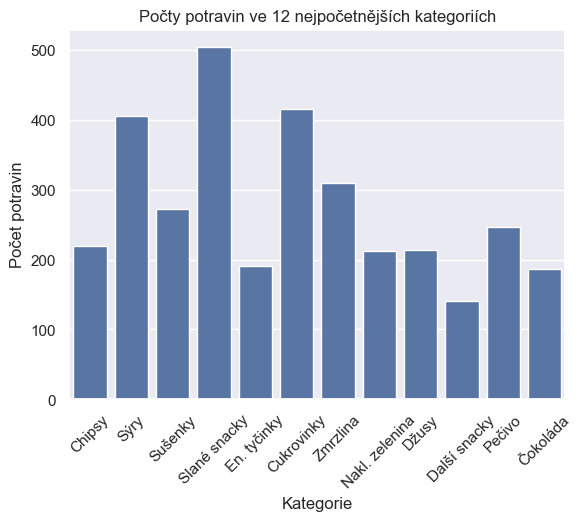

In [110]:
ax = sns.countplot(food_top_cat, x="branded_food_category")

# To switch axes, specify the 'y' parameter instead of 'x'
# ax = sns.countplot(data=food_top_cat, y="branded_food_category")

ax.tick_params(axis="x", rotation=45)
# ax.bar_label(ax.containers[0])
ax.set(
    xlabel="Kategorie",
    ylabel="Počet potravin",
    title="Počty potravin ve 12 nejpočetnějších kategoriích",
)

## Histogram

In [111]:
food_merged_brands = pd.merge(food_brands, food_nutrient, on="fdc_id")
food_merged_brands = food_merged_brands.rename(
    columns={"name": "nutrient_name"})
food_merged_brands_protein = food_merged_brands[
    food_merged_brands["nutrient_name"] == "Protein"
]

[Text(0.5, 1.0, 'Histogram'),
 Text(0, 0.5, 'Pocet'),
 Text(0.5, 0, 'Mnoztvi proteinu')]

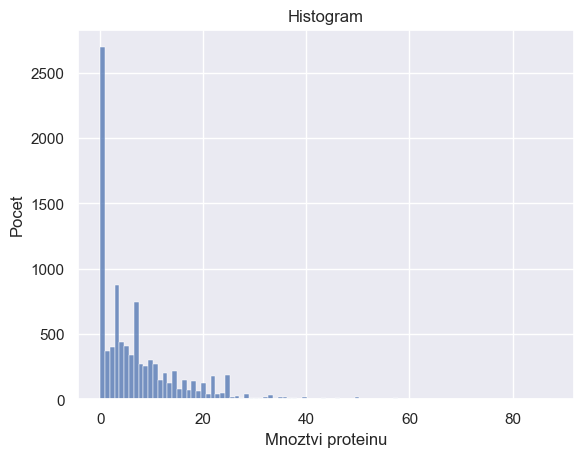

In [137]:
ax = sns.histplot(
    food_merged_brands_protein,
    x="amount",
    # bins=range(0, 100, 10),
    # color='r',
)

ax.set(title="Histogram", ylabel="Pocet", xlabel="Mnoztvi proteinu")

# plt.title('Histogram', fontsize=24, fontfamily='Arial')

## Barplot

In [124]:
food_brands_nut = pd.merge(food_top_cat, food_nutrient, on="fdc_id")

[Text(0.5, 0, 'Kategorie'),
 Text(0, 0.5, 'Množství proteinu (g)'),
 Text(0.5, 1.0, 'Průměrné množství proteinů v potravinách')]

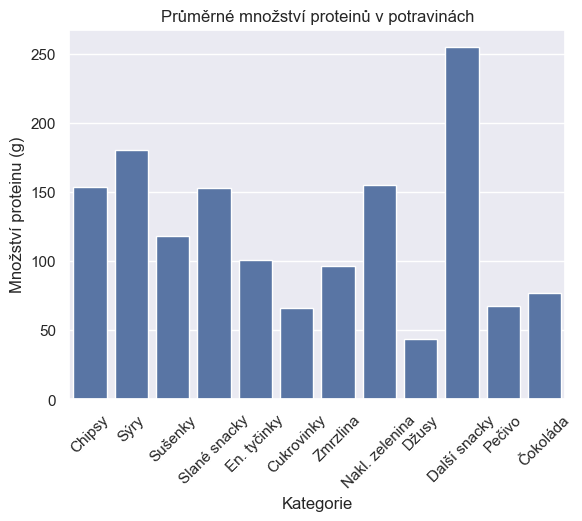

In [133]:
# # Nastavení velikosti grafu
# plt.figure(figsize=(12, 6))

# Vytvoření barového grafu pomocí Seaborn
ax = sns.barplot(
    data=food_brands_nut,
    x="branded_food_category",
    y="amount",
    #  palette="Greens",
    #  hue="branded_food_category",
    errorbar=None,
)

# Nastavení parametrů os a názvu grafu
ax.tick_params(axis="x", rotation=45)
ax.set(
    xlabel="Kategorie",
    ylabel="Množství proteinu (g)",
    title="Průměrné množství proteinů v potravinách",
)

## Boxplot

In [117]:
food_merged_brands["nutrient_name"] = food_merged_brands["nutrient_name"].replace(
    {"Total lipid (fat)": "Lipid (tuk)"}
)

food_merged_brands_box = food_merged_brands[
    (food_merged_brands["nutrient_name"].isin(["Protein", "Lipid (tuk)"]))
    & (food_merged_brands["branded_food_category"] == "En. tyčinky")
]

[Text(0.5, 0, 'Kategorie'),
 Text(0, 0.5, 'Množství v gramech'),
 Text(0.5, 1.0, 'Množství proteinů a lipidů (tuků) v potravinách')]

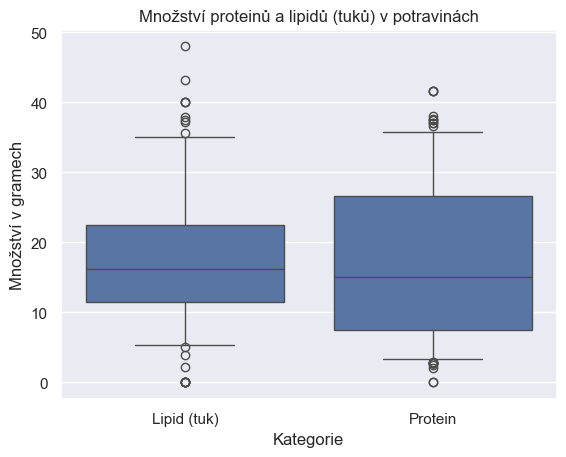

In [118]:
ax = sns.boxplot(
    food_merged_brands_box,
    x="nutrient_name",
    y="amount",
    whis=[5, 95],
    # palette="Blues",
    # hue="nutrient_name",
    # color="yellow",
)

ax.set(
    xlabel="Kategorie",
    ylabel="Množství v gramech",
    title="Množství proteinů a lipidů (tuků) v potravinách",
)

# food_merged_brands_box.groupby("nutrient_name")["amount"].describe()

In [119]:
# Globalni nastaveni notebooku

# sns.set_theme(style="darkgrid")
# plt.rcParams['font.family'] = 'Arial'  # Změňte na požadovaný font

---
## Cvičení

### Odstín

V rámci lekce jsme porovnávali množství proteinů a lipidů (tuků) v energetických tyčinkách. 

Potřebná data máme v tabulce `food_merged_brands`. 

Podobné srování můžeme udělat i s využitím histogramu. 

Použij funkce histogram pro tabulku `food_merged_brands_box`. 

Abys dokázal(a) rozlišit mezi oběma výživnými látkami, použij parametr `hue`, kterému zadáš jako hodnotu `nutrient_name`. 

Díky tomu bude mít každá výživná látka samostatný sloupec se svojí barvou. 

Dále použij funkci `range`, tentokrát ale rozděl hodnoty po pěti, tj. hranice intervalů budou 0, 5, 10, 15 atd. 

Zobraz si výsledný graf. 

Protože toto zobrazení může být poněkud nepřehledné vyzkoušej ještě přidat parametr `multiple` s hodnotou `stack`.

[Text(0.5, 0, 'Množství výživných látek'),
 Text(0, 0.5, 'Počet potravin'),
 Text(0.5, 1.0, 'Množství proteinu v potravinách')]

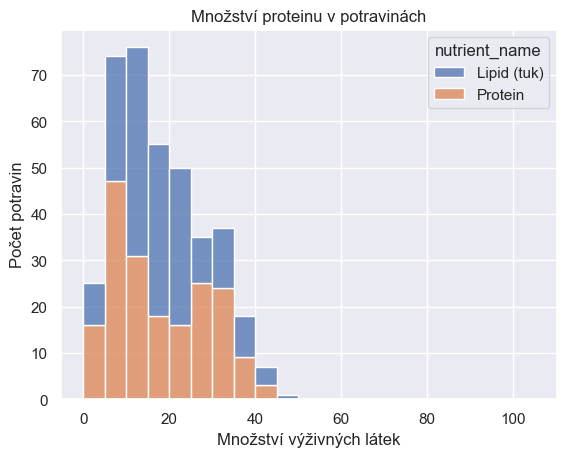

In [120]:
ax = sns.histplot(
    food_merged_brands_box,
    x="amount",
    bins=range(0, 110, 5),
    hue="nutrient_name",
    multiple="stack",
)

ax.set(
    xlabel="Množství výživných látek",
    ylabel="Počet potravin",
    title="Množství proteinu v potravinách",
)

### Catplot

Další zajímavý graf, který `seaborn` umí, je `catplot`. Pomocí něj můžeme porovnat obsat výživných látek pro jednotlivé kategorie potravin. Tvým úkolem bude porovnat obsah proteinů a karbohydrátů pro 12 nejčastějších kategorií.

Vytvoř si pomocí dotazu tabulku, ve které budou informace pouze o proteinech a karbohydrátech. Karbohydráty hledej pod názvem `Carbohydrate, by difference`. Můžeš je přejmenovat na "Karbohydráty" pomocí metody `replace`.


In [121]:
food_brands_nut["name"] = food_brands_nut["name"].replace(
    "Carbohydrate, by difference", "Karbohydráty"
)
food_top_cat_carb_prot = food_brands_nut[
    food_brands_nut["name"].isin(["Karbohydráty", "Protein"])
]


Dále použij funkci `catplot`. Její použití je velmi podobné ostatním funkcím. Jako první parametr zadej tabulku s daty, jako parametr `x` sloupeček s názvem kategorie (`food_brands_top_nut_prot`), jako parametr `y` sloupeček `amount` a jako parametr `hue` sloupeček `nutrition_name`. Alternativně můžeš před vygenerováním grafu sloupeček `nutrition_name` přejemnovat například na `Výživná látka`, protože bude použit jako nadpis legendy.

Nech si zobrazit graf. Jednotlivé tečky představují hodnoty pro jednotlivé potraviny, každá tečka reprezentuje jednu potravinu. Barva tečky určuje, o jakou výživnou látku jde. Dále zkus přidat k volání funkce `catplot` parametr s `s` hodnotou 2 a podívej se, jak se graf změnil. Zkus případně i jiného hodnoty tohoto parametru.

Prohlédni si graf a odpověz na otázky:

- Pro jakou kategorii platí, že drtivá většina výrobků má více proteinů než karbohydrátů?
- Pro jakou kategorii platí, že drtivá většina výrobků má více karbohydrátů než proteinů?
- Existuje nějaká kategorie, kde je na výběr alespoň několik produktů s větším množství karbohydrátů než proteinů, ale i několik produktů s větším množstvím proteinů než karbohydrátů?

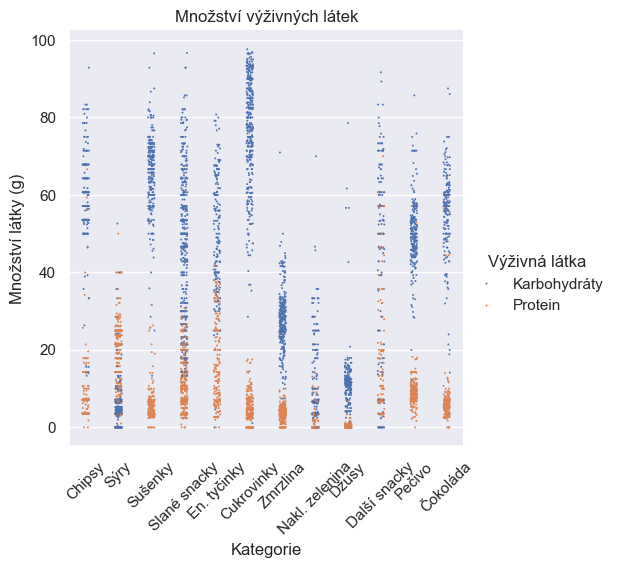

In [122]:
ax = sns.catplot(
    data=food_top_cat_carb_prot,
    x="branded_food_category",
    y="amount",
    hue="name",
    s=2,
)
ax.tick_params(axis="x", rotation=45)
ax._legend.set_title("Výživná látka")


ax.set(
    xlabel="Kategorie",
    ylabel="Množství látky (g)",
    title="Množství výživných látek",
)

Kam dál: 
- https://www.data-to-viz.com/
- https://seaborn.pydata.org/index.html 